In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns                     
import sklearn

/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Import Processed train, test, and validation sets

In [3]:
X_train_res = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/X_train_res.csv')
X_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/X_test.csv')
X_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/X_val.csv')
y_train_res = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/y_train_res.csv')
y_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/y_test.csv')
y_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY_695_078/Customer Churn Final Project/customer_churn_2024/customer_churn_2024/data/y_val.csv')

## SVM

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score

# Initialize SVM classifier
svm = SVC()

# Fit the model to the training data
svm.fit(X_train_res, y_train_res)

# Predict on the validation set
y_val_pred = svm.predict(X_val)

# Evaluate the model on the validation set
print("\nValidation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))




/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1386
           1       0.32      0.77      0.45       235

    accuracy                           0.73      1621
   macro avg       0.63      0.75      0.64      1621
weighted avg       0.86      0.73      0.77      1621

Validation Set Accuracy: 0.729179518815546


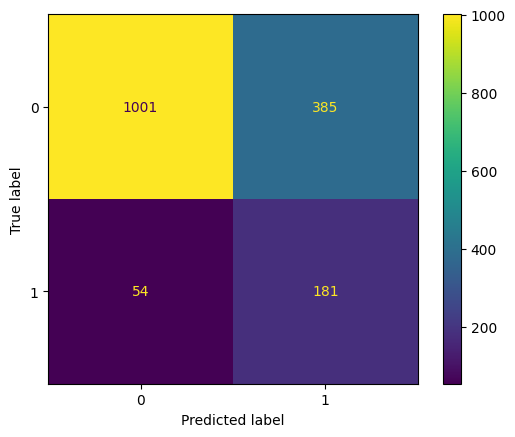

In [5]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix_val = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)


## Hyperparameter Tuning with GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], #regularization parameter. Small C means more regularization (more generalized results)
              'gamma': [1,0.1,0.01], #small gamma will create a smoother decision boundary, while a large gamma will make the decision boundary more irregular
              'kernel': ['rbf', 'poly', 'sigmoid']} #different kernel types

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=True, n_jobs=-1)

#fit small portion of the data to grid search
X_val_small = X_val[:100]
y_val_small = y_val[:100]
grid.fit(X_val_small,y_val_small)

print(grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

KeyboardInterrupt: 

In [36]:
from skopt import BayesSearchCV

param_grid = {'C': [0.1,1, 10, 100], #regularization parameter. Small C means more regularization (more generalized results)
              'gamma': [1,0.1,0.01], #small gamma will create a smoother decision boundary, while a large gamma will make the decision boundary more irregular
              'kernel': ['rbf', 'poly', 'sigmoid']} 

bayes_search = BayesSearchCV(
    estimator=SVC(),
    search_spaces=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    random_state=42,
    scoring='recall',  # Use your desired scoring metric
    cv=5
)


bayes_search.fit(X_val, y_val)


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## Validation

## PR Curve

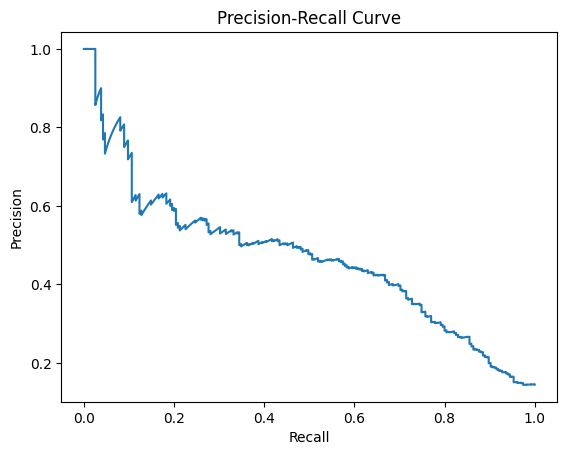

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probas_pred = svm.decision_function(X_val)
precision, recall, thresholds = precision_recall_curve(y_val, probas_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## ROC-AUC

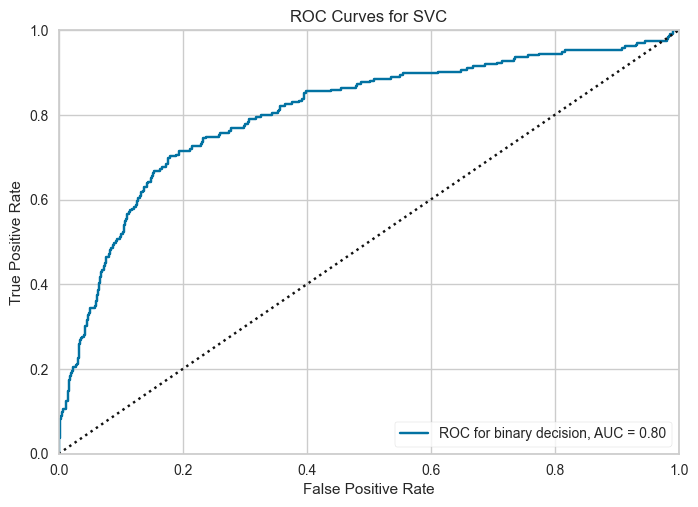

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
from yellowbrick.classifier import (ROCAUC)

classes = ["0", "1"]
visualizer = ROCAUC(svm, classes=classes, is_fitted=True, binary=True)

visualizer.fit(X_train_res, y_train_res)       
visualizer.score(X_val, y_val)      
visualizer.show()

ROC is 0.8, this shows that the model performs well at distinguishing posistive and negative values. 

In [ ]:
# Use learning curve to check overfitting
from sklearn.model_selection import StratifiedKFold

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    model_XGB, 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train_small, y_train_small)        # Fit the data to the visualizer
visualizer.poof() 
